# **Paso 1: Intalación librería para modelo embedding - Carga Dataframe y librerias especificas**

In [1]:
pip install  gensim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VO/Municipalidades.csv', delimiter=';')
df.head()

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,Numero informe publicado,ag_id_entidad_servicio,ah_servicio,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva
0,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261813.0,I.11.Falta de registro de ingreso de solicitud...,MEDIANAMENTE COMPLEJA,Sin datos,NaN
1,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261814.0,I.12. Falta de registro de emisión de certific...,MEDIANAMENTE COMPLEJA,Sin datos,NaN
2,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261815.0,I.13. Sobre falta de registro de los comproban...,MEDIANAMENTE COMPLEJA,Sin datos,NaN
3,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261816.0,I.14. Desorden documental en expedientes.,LEVEMENTE COMPLEJA,Sin datos,NaN
4,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261817.0,I.15. Ausencia de planos de subdivisión y lote...,COMPLEJA,Sin datos,NaN


In [5]:
len(df)

31312

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31312 entries, 0 to 31311
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id Fiscalizacion          31312 non-null  int64  
 1   Numero Programa           31312 non-null  int64  
 2   Periodo Programa          31312 non-null  int64  
 3   Tipo Fiscalizacion        31312 non-null  object 
 4   Nombre Fiscalizacion      31312 non-null  object 
 5   Materia Fiscalizacion     31312 non-null  object 
 6   Objetivo Fiscalizacion    25536 non-null  object 
 7   ID Entidad                31312 non-null  int64  
 8   Dependencia               31312 non-null  object 
 9   Entidad                   31312 non-null  object 
 10  Región                    31312 non-null  object 
 11  Sector                    31312 non-null  object 
 12  Área temática             31312 non-null  object 
 13  Numero informe publicado  27682 non-null  float64
 14  ag_id_

In [7]:
df.nunique()

,0
Id Fiscalizacion,4903
Numero Programa,663
Periodo Programa,5
Tipo Fiscalizacion,4
Nombre Fiscalizacion,1739
Materia Fiscalizacion,4352
Objetivo Fiscalizacion,776
ID Entidad,658
Dependencia,344
Entidad,658


In [8]:
#Missing Data
df.isnull().sum().sort_values(ascending=False)

,0
Accion correctiva,14829
Objetivo Fiscalizacion,5776
Titulo Observacion,3651
ID Observacion,3651
Link informe publicado,3630
Año informe publicado,3630
Numero informe publicado,3630
Área temática,0
Accion derivada,0
Complejidad Observacion,0


In [9]:
df.dropna(subset=['Titulo Observacion'],inplace=True)

In [10]:
#Missing Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27661 entries, 0 to 31255
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id Fiscalizacion          27661 non-null  int64  
 1   Numero Programa           27661 non-null  int64  
 2   Periodo Programa          27661 non-null  int64  
 3   Tipo Fiscalizacion        27661 non-null  object 
 4   Nombre Fiscalizacion      27661 non-null  object 
 5   Materia Fiscalizacion     27661 non-null  object 
 6   Objetivo Fiscalizacion    25519 non-null  object 
 7   ID Entidad                27661 non-null  int64  
 8   Dependencia               27661 non-null  object 
 9   Entidad                   27661 non-null  object 
 10  Región                    27661 non-null  object 
 11  Sector                    27661 non-null  object 
 12  Área temática             27661 non-null  object 
 13  Numero informe publicado  27661 non-null  float64
 14  ag_id_entid

In [11]:
df['Tipo Fiscalizacion'].value_counts()

,count
Tipo Fiscalizacion,
AUDITORIA,24574
INVESTIGACION,2123
INSPECCION_OBRA_PUBLICA,964


In [12]:
df = df[df['Tipo Fiscalizacion'] == 'AUDITORIA']

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.head()

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,Numero informe publicado,ag_id_entidad_servicio,ah_servicio,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva
0,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261813.0,I.11.Falta de registro de ingreso de solicitud...,MEDIANAMENTE COMPLEJA,Sin datos,NaN
1,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261814.0,I.12. Falta de registro de emisión de certific...,MEDIANAMENTE COMPLEJA,Sin datos,NaN
2,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261815.0,I.13. Sobre falta de registro de los comproban...,MEDIANAMENTE COMPLEJA,Sin datos,NaN
3,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261816.0,I.14. Desorden documental en expedientes.,LEVEMENTE COMPLEJA,Sin datos,NaN
4,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,125.0,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261817.0,I.15. Ausencia de planos de subdivisión y lote...,COMPLEJA,Sin datos,NaN


In [15]:
df['Tipo Fiscalizacion'].value_counts()

,count
Tipo Fiscalizacion,
AUDITORIA,24574


In [16]:
df.iloc[7988]

,7988
Id Fiscalizacion,77302
Numero Programa,8022
Periodo Programa,2021
Tipo Fiscalizacion,AUDITORIA
Nombre Fiscalizacion,AUDITORIA MUNICIPALIDAD DE CABRERO UCE VIII
Materia Fiscalizacion,PREPARACIÓN Y EJECUCIÓN AUDITORIA
Objetivo Fiscalizacion,Auditar la ejecución del contrato del servicio...
ID Entidad,146
Dependencia,MUNICIPALIDAD DE CABRERO
Entidad,MUNICIPALIDAD DE CABRERO


# **BAG OF WORDS**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Bag of Words model
bow_vectorizer = CountVectorizer(
    analyzer='word',
    max_df=0.95, #Esto significa que cualquier palabra que aparezca en el 95% o más de los documentos será ignorada.
    min_df=2, #Esto significa que se ignorarán las palabras que aparezcan en menos de 2 documentos.
    #stop_words='english',  #
    token_pattern=r'\b(?!falta|ausencia|respecto|cuentas|sobre)[a-zA-ZáéíóúÁÉÍÓÚñÑ]{5,}\b' # Devuelve una coincidencia para cualquier carácter alfabéticamente entre A y Z, minúscula o mayúscula (desde 4 letras)
)

# CountVectorizer se aplica a DataFrame
bow_matrix = bow_vectorizer.fit_transform(df['Titulo Observacion'])

# Convierta la matriz BoW en un DataFrame para una fácil visualización
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

# BoW DataFrame
bow_df.head()


,abandonados,abandono,abastecimiento,abatible,abiertas,abogado,abonar,abono,abonos,abril,...,ñuble,ñuñoa,óptica,órdenes,órgano,último,única,único,únicos,útiles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


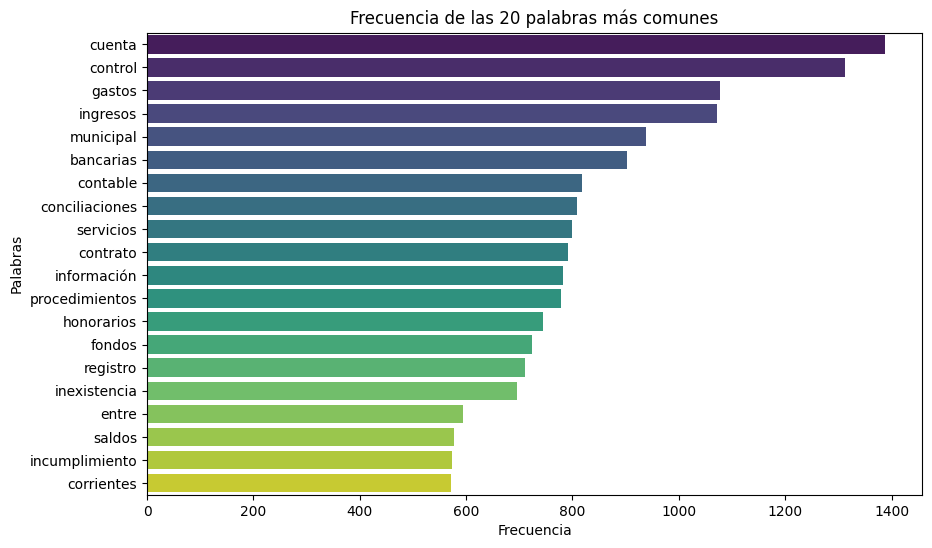

In [18]:
#Visualizar las 20 palabras mas frecuentes
word_freq = bow_df.sum(axis=0).sort_values(ascending=False)

# Selecciona las 20 palabras más frecuentes
top_20_words = word_freq.head(20)

# Visualiza las 20 palabras más frecuentes en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_words.values, y=top_20_words.index, palette='viridis')
plt.title("Frecuencia de las 20 palabras más comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.show()

# **TF-IDF**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    analyzer='word',
    max_df=0.95,
    min_df=2,
    #stop_words= 'english',
    token_pattern=r'\b(?!falta|ausencia|respecto|cuentas|sobre)[a-zA-ZáéíóúÁÉÍÓÚñÑ]{5,}\b'
)

# Apply the TfidfVectorizer to the 'text' column in the DataFrame
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Titulo Observacion'])

# Convert the TF-IDF matrix to a DataFrame for easy visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
tfidf_df.head()

,abandonados,abandono,abastecimiento,abatible,abiertas,abogado,abonar,abono,abonos,abril,...,ñuble,ñuñoa,óptica,órdenes,órgano,último,única,único,únicos,útiles
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


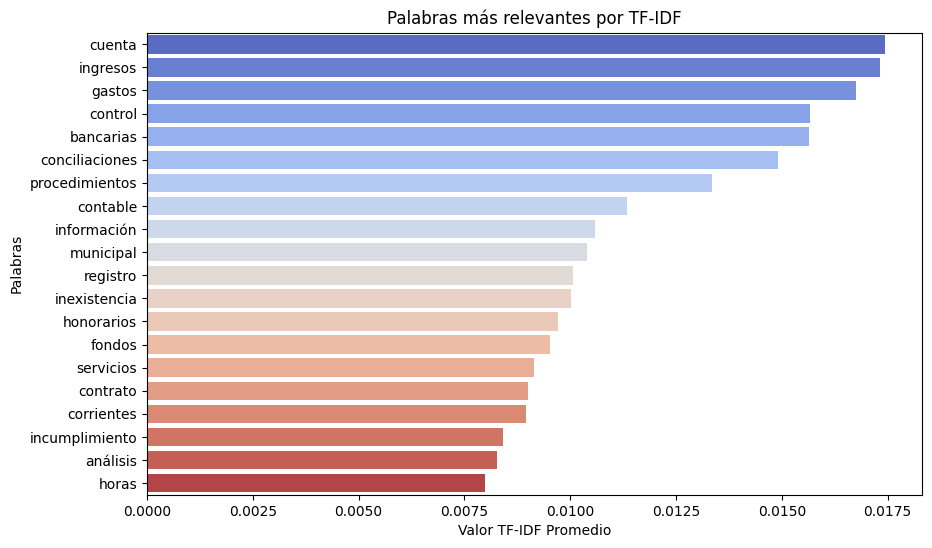

In [20]:
#Visualizando las 20 palabras mas relevantes segun TF-IDF
tfidf_mean = tfidf_df.mean(axis=0).sort_values(ascending=False)

# Selecciona las 20 palabras con los valores TF-IDF más altos
top_20_tfidf = tfidf_mean.head(20)

# Visualiza las 20 palabras más relevantes en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_tfidf.values, y=top_20_tfidf.index, palette='coolwarm')
plt.title("Palabras más relevantes por TF-IDF")
plt.xlabel("Valor TF-IDF Promedio")
plt.ylabel("Palabras")
plt.show()

In [68]:
#Visualizando las 20 palabras mas relevantes segun TF-IDF
tfidf_mean = tfidf_df.mean(axis=1)
tfidf_mean.describe()


,0
count,24574.000000
mean,0.000463
std,0.000123
min,0.000000
25%,0.000381
50%,0.000442
75%,0.000536
max,0.001498


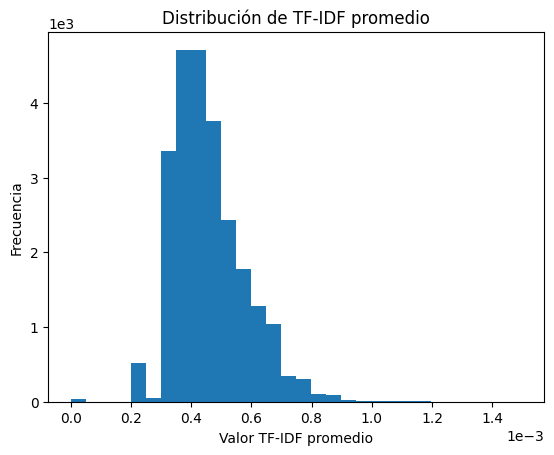

In [67]:
tfidf_mean.hist(bins=30, grid=False)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-2,2))
plt.title('Distribución de TF-IDF promedio')
plt.xlabel('Valor TF-IDF promedio')
plt.ylabel('Frecuencia')
plt.show()

# **LDA COMPLETO**

Number of Topics: 2, Perplexity: 2046.061, Coherence Score: 0.326
Number of Topics: 3, Perplexity: 2373.842, Coherence Score: 0.347
Number of Topics: 4, Perplexity: 2660.419, Coherence Score: 0.332
Number of Topics: 5, Perplexity: 2913.615, Coherence Score: 0.321
Number of Topics: 6, Perplexity: 3162.200, Coherence Score: 0.335
Number of Topics: 7, Perplexity: 3378.488, Coherence Score: 0.337
Number of Topics: 8, Perplexity: 3562.176, Coherence Score: 0.325
Number of Topics: 9, Perplexity: 3790.282, Coherence Score: 0.328


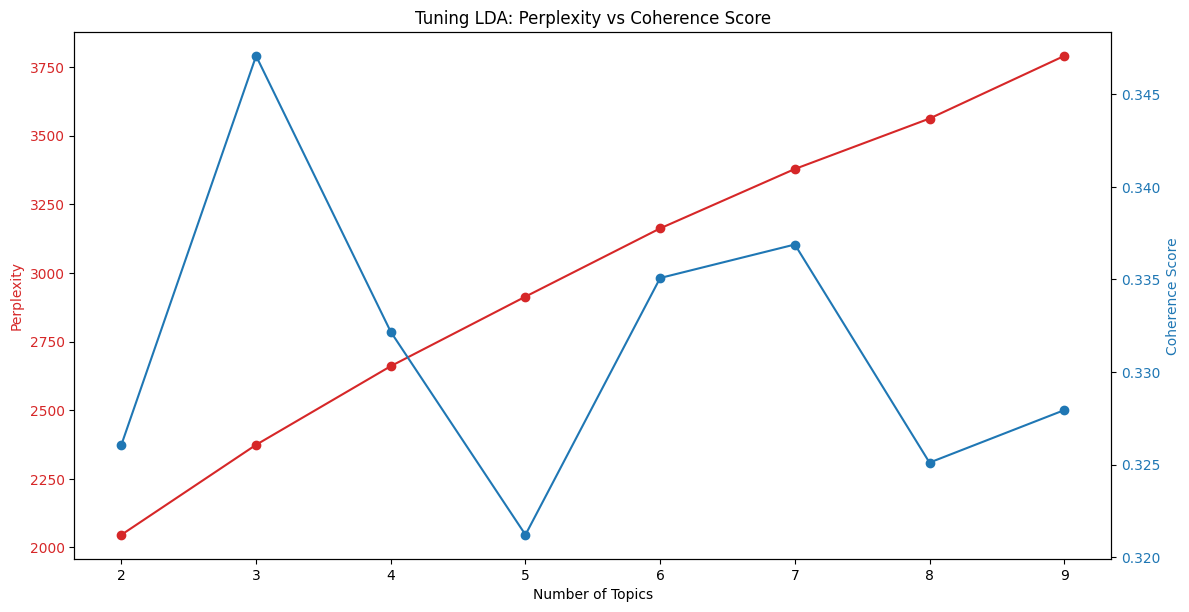

Topic 1:
cuenta análisis saldos saldo cheques contable información registro entre fondos bancaria funciones deuda permisos conciliación
Topic 2:
control servicios bienes recepción municipal incumplimiento acreditación debilidades contrato parte proceso partidas honorarios documentación respaldo
Topic 3:
ingresos gastos bancarias conciliaciones procedimientos cuenta horas manuales percibir ejecución manual seguridad extraordinarias corrientes honorarios


In [21]:
from gensim.models.coherencemodel import CoherenceModel
import gensim
import gensim.corpora as corpora
from sklearn.decomposition import LatentDirichletAllocation


# Step 2: Tune the number of topics using Perplexity and Coherence Score
num_topics_range = range(2, 10)  # Range of topics to try
perplexity_scores = []
coherence_scores = []

# Prepare the data for gensim coherence calculation
texts = [doc.split() for doc in df['Titulo Observacion']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

for num_topics in num_topics_range:
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(tfidf_matrix)

    # Calculate Perplexity
    perplexity = lda_model.perplexity(tfidf_matrix)
    perplexity_scores.append(perplexity)

    # Calculate Coherence Score using gensim
    lda_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, iterations=200, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

    print(f"Number of Topics: {num_topics}, Perplexity: {perplexity:.3f}, Coherence Score: {coherence_score:.3f}")

# Step 3: Plot the results to visualize optimal number of topics
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Perplexity', color=color)
ax1.plot(num_topics_range, perplexity_scores, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Coherence Score', color=color)  # we already handled the x-label with ax1
ax2.plot(num_topics_range, coherence_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Tuning LDA: Perplexity vs Coherence Score')
plt.show()

# Step 4: Choose the optimal number of topics (based on Perplexity and Coherence)
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]

# Final LDA Model with the chosen number of topics
lda_final = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42)
lda_final.fit(tfidf_matrix)

# Display top words for each topic
n_top_words = 15
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_final.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

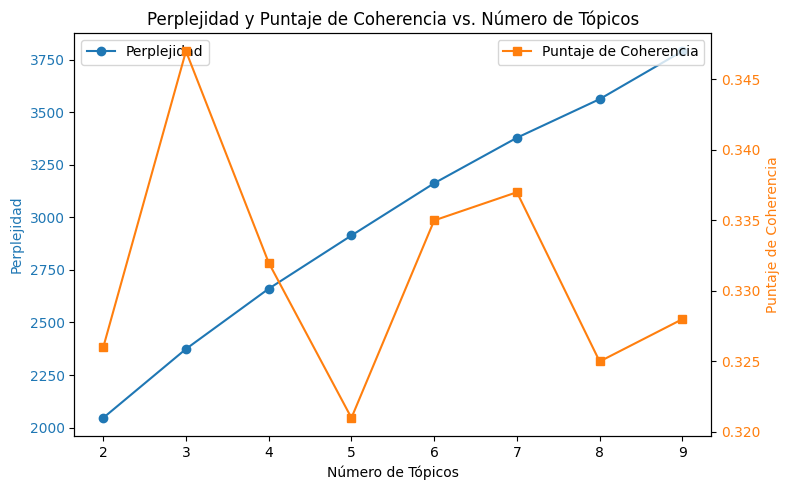

In [72]:
import matplotlib.pyplot as plt

# Datos
temas = [2, 3, 4, 5, 6, 7, 8, 9]
perplejidad = [2046.061, 2373.842, 2660.419, 2913.615, 3162.200, 3378.488, 3562.176, 3790.282]
coherencia = [0.326, 0.347, 0.332, 0.321, 0.335, 0.337, 0.325, 0.328]

# Crear figura y eje
fig, ax1 = plt.subplots(figsize=(8, 5))

# Eje izquierdo (Perplejidad)
ax1.set_xlabel('Número de Tópicos')
ax1.set_ylabel('Perplejidad', color='tab:blue')
ax1.plot(temas, perplejidad, marker='o', color='tab:blue', label='Perplejidad')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Eje derecho (Coherencia)
ax2 = ax1.twinx()
ax2.set_ylabel('Puntaje de Coherencia', color='tab:orange')
ax2.plot(temas, coherencia, marker='s', color='tab:orange', label='Puntaje de Coherencia')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

# Configuración final
plt.title('Perplejidad y Puntaje de Coherencia vs. Número de Tópicos')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Word Embeddings: Doc2Vec**

In [22]:
import gensim
from gensim.utils import simple_preprocess

# Tokenizar y preprocesar los datos de texto.
df['tokenized_text'] = df['Titulo Observacion'].apply(lambda x: simple_preprocess(x))


In [23]:
df.head()

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,ag_id_entidad_servicio,ah_servicio,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva,tokenized_text
0,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261813.0,I.11.Falta de registro de ingreso de solicitud...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[falta, de, registro, de, ingreso, de, solicit..."
1,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261814.0,I.12. Falta de registro de emisión de certific...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[falta, de, registro, de, emisión, de, certifi..."
2,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261815.0,I.13. Sobre falta de registro de los comproban...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[sobre, falta, de, registro, de, los, comproba..."
3,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261816.0,I.14. Desorden documental en expedientes.,LEVEMENTE COMPLEJA,Sin datos,NaN,"[desorden, documental, en, expedientes]"
4,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,102,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261817.0,I.15. Ausencia de planos de subdivisión y lote...,COMPLEJA,Sin datos,NaN,"[ausencia, de, planos, de, subdivisión, loteos..."


In [24]:
df['obs_len']=df['tokenized_text'].apply(len)

In [25]:
df.head()

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,ah_servicio,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva,tokenized_text,obs_len
0,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261813.0,I.11.Falta de registro de ingreso de solicitud...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[falta, de, registro, de, ingreso, de, solicit...",11
1,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261814.0,I.12. Falta de registro de emisión de certific...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[falta, de, registro, de, emisión, de, certifi...",12
2,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261815.0,I.13. Sobre falta de registro de los comproban...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[sobre, falta, de, registro, de, los, comproba...",17
3,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261816.0,I.14. Desorden documental en expedientes.,LEVEMENTE COMPLEJA,Sin datos,NaN,"[desorden, documental, en, expedientes]",4
4,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,MUNICIPALIDAD DE PICHILEMU,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261817.0,I.15. Ausencia de planos de subdivisión y lote...,COMPLEJA,Sin datos,NaN,"[ausencia, de, planos, de, subdivisión, loteos...",15


In [26]:
df[df['obs_len']==0]

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,ah_servicio,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva,tokenized_text,obs_len
13843,81838,18021,2022,AUDITORIA,AUDITORIA MUNICIPALIDAD DE LO BARNECHEA I_CRM-...,LA FISCALIZACIÓN TIENE POR OBJETO REALIZAR UNA...,La fiscalización tiene por objeto realizar una...,299,MUNICIPALIDAD DE LO BARNECHEA,MUNICIPALIDAD DE LO BARNECHEA,...,MUNICIPALIDAD DE LO BARNECHEA,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,356095.0,3.4 b),ALTAMENTE COMPLEJA,Sin datos,NaN,[],0
13844,81838,18021,2022,AUDITORIA,AUDITORIA MUNICIPALIDAD DE LO BARNECHEA I_CRM-...,LA FISCALIZACIÓN TIENE POR OBJETO REALIZAR UNA...,La fiscalización tiene por objeto realizar una...,299,MUNICIPALIDAD DE LO BARNECHEA,MUNICIPALIDAD DE LO BARNECHEA,...,MUNICIPALIDAD DE LO BARNECHEA,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,356400.0,3.4 a),ALTAMENTE COMPLEJA,Sin datos,NaN,[],0
13853,81838,18021,2022,AUDITORIA,AUDITORIA MUNICIPALIDAD DE LO BARNECHEA I_CRM-...,LA FISCALIZACIÓN TIENE POR OBJETO REALIZAR UNA...,La fiscalización tiene por objeto realizar una...,299,MUNICIPALIDAD DE LO BARNECHEA,MUNICIPALIDAD DE LO BARNECHEA,...,MUNICIPALIDAD DE LO BARNECHEA,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,359952.0,3.4 c),ALTAMENTE COMPLEJA,Procedimiento disciplinario por el servicio,El municipio deberá adoptar las medidas necesa...,[],0
16380,84228,5065,2022,AUDITORIA,AUDITORIA DEPARTAMENTO DE EDUCACION DE EL TABO...,AUDITORÍA Y EXAMEN DE CUENTAS A LAS ADQUISICIO...,Auditoría y examen de cuentas a las adquisicio...,389,MUNICIPALIDAD DE EL TABO,DEPARTAMENTO DE EDUCACION DE EL TABO,...,DEPARTAMENTO DE EDUCACION DE EL TABO,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,374442.0,21.b,ALTAMENTE COMPLEJA,Procedimiento disciplinario por el servicio,NaN,[],0
16381,84228,5065,2022,AUDITORIA,AUDITORIA DEPARTAMENTO DE EDUCACION DE EL TABO...,AUDITORÍA Y EXAMEN DE CUENTAS A LAS ADQUISICIO...,Auditoría y examen de cuentas a las adquisicio...,389,MUNICIPALIDAD DE EL TABO,DEPARTAMENTO DE EDUCACION DE EL TABO,...,DEPARTAMENTO DE EDUCACION DE EL TABO,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,374442.0,21.b,ALTAMENTE COMPLEJA,Remitir antecedentes para conocimiento del Min...,NaN,[],0
16382,84228,5065,2022,AUDITORIA,AUDITORIA DEPARTAMENTO DE EDUCACION DE EL TABO...,AUDITORÍA Y EXAMEN DE CUENTAS A LAS ADQUISICIO...,Auditoría y examen de cuentas a las adquisicio...,389,MUNICIPALIDAD DE EL TABO,DEPARTAMENTO DE EDUCACION DE EL TABO,...,DEPARTAMENTO DE EDUCACION DE EL TABO,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,374442.0,21.b,ALTAMENTE COMPLEJA,Reparo,NaN,[],0
16394,84228,5065,2022,AUDITORIA,AUDITORIA DEPARTAMENTO DE EDUCACION DE EL TABO...,AUDITORÍA Y EXAMEN DE CUENTAS A LAS ADQUISICIO...,Auditoría y examen de cuentas a las adquisicio...,389,MUNICIPALIDAD DE EL TABO,DEPARTAMENTO DE EDUCACION DE EL TABO,...,DEPARTAMENTO DE EDUCACION DE EL TABO,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,409502.0,22.b,ALTAMENTE COMPLEJA,Remitir antecedentes para conocimiento del Min...,NaN,[],0
16395,84228,5065,2022,AUDITORIA,AUDITORIA DEPARTAMENTO DE EDUCACION DE EL TABO...,AUDITORÍA Y EXAMEN DE CUENTAS A LAS ADQUISICIO...,Auditoría y examen de cuentas a las adquisicio...,389,MUNICIPALIDAD DE EL TABO,DEPARTAMENTO DE EDUCACION DE EL TABO,...,DEPARTAMENTO DE EDUCACION DE EL TABO,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,409502.0,22.b,ALTAMENTE COMPLEJA,Reparo,NaN,[],0
16396,84228,5065,2022,AUDITORIA,AUDITORIA DEPARTAMENTO DE EDUCACION DE EL TABO...,AUDITORÍA Y EXAMEN DE CUENTAS A LAS ADQUISICIO...,Auditoría y examen de cuentas a las adquisicio...,389,MUNICIPALIDAD DE EL TABO,DEPARTAMENTO DE EDUCACION DE EL TABO,...,DEPARTAMENTO DE EDUCACION DE EL TABO,2022.0,http://

In [27]:
# Get the index labels of the rows to drop.
index_to_drop = df[df['obs_len'] == 0].index

# Drop those rows from the original DataFrame.
df.drop(index=index_to_drop, inplace=True)

In [28]:
df[df['obs_len']==0]

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,ah_servicio,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva,tokenized_text,obs_len


In [29]:
df['obs_len'].describe()

,obs_len
count,24563.000000
mean,9.189391
std,5.361096
min,1.000000
25%,6.000000
50%,8.000000
75%,11.000000
max,135.000000


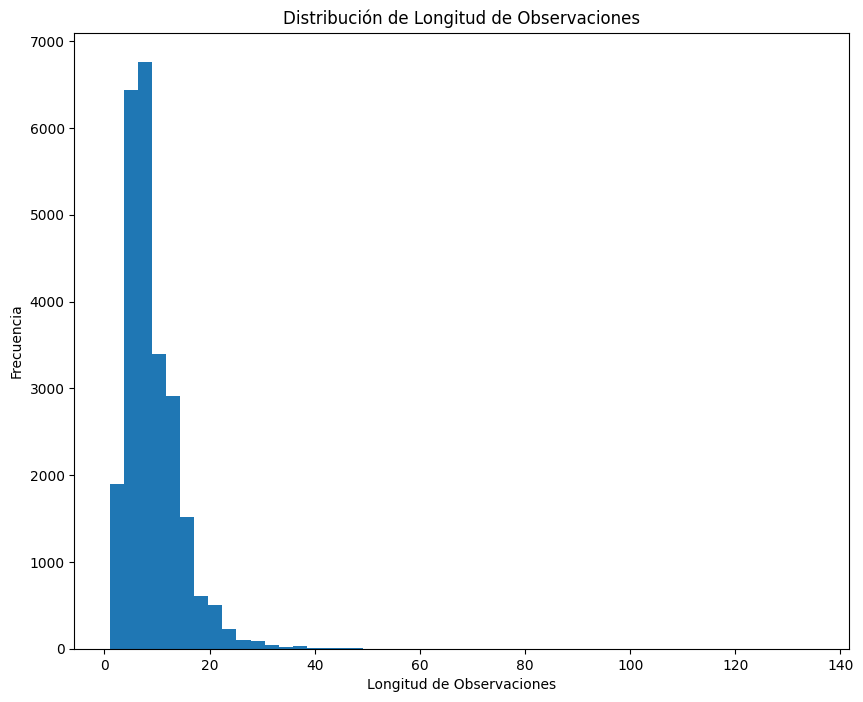

In [53]:
plt.figure(figsize=(10, 8))
df['obs_len'].hist(bins=50, grid=False)
plt.title('Distribución de Longitud de Observaciones')
plt.xlabel('Longitud de Observaciones')
plt.ylabel('Frecuencia')
plt.show()

In [31]:
df.reset_index(drop=True, inplace=True)

Entrenamiento vía Doc2Vec

In [32]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Crear documentos etiquetados
tagged_documents = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(df['tokenized_text'])]

# Entrenamiento Doc2Vec model
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(tagged_documents)
model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)


Tranformación de Obs_embeddings a vectores

In [33]:
df['doc2vec'] = df['tokenized_text'].apply(lambda x: model.infer_vector(x))


Visualización

In [35]:
df.head()

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva,tokenized_text,obs_len,doc2vec
0,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261813.0,I.11.Falta de registro de ingreso de solicitud...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[falta, de, registro, de, ingreso, de, solicit...",11,"[0.13002808, -0.30107442, -0.04391913, 0.23152..."
1,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261814.0,I.12. Falta de registro de emisión de certific...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[falta, de, registro, de, emisión, de, certifi...",12,"[0.2477094, -0.28831476, 0.12998788, 0.1349141..."
2,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261815.0,I.13. Sobre falta de registro de los comproban...,MEDIANAMENTE COMPLEJA,Sin datos,NaN,"[sobre, falta, de, registro, de, los, comproba...",17,"[0.5534787, -0.14077055, 0.1950711, 0.26524433..."
3,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261816.0,I.14. Desorden documental en expedientes.,LEVEMENTE COMPLEJA,Sin datos,NaN,"[desorden, documental, en, expedientes]",4,"[-0.08577829, 0.011107352, -0.1368551, 0.07650..."
4,67805,6000,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PICHILEMU,AUDITORIA PLANIFICADA,Efectuar una auditoría a los procesos de ingre...,102,MUNICIPALIDAD DE PICHILEMU,MUNICIPALIDAD DE PICHILEMU,...,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,261817.0,I.15. Ausencia de planos de subdivisión y lote...,COMPLEJA,Sin datos,NaN,"[ausencia, de, planos, de, subdivisión, loteos...",15,"[-0.22953822, -0.17348428, 0.037685953, 0.3330..."


In [36]:
from sklearn.decomposition import PCA

# Extrae Doc2Vec desde el DataFrame
doc_vectors = pd.DataFrame(df['doc2vec'].tolist())


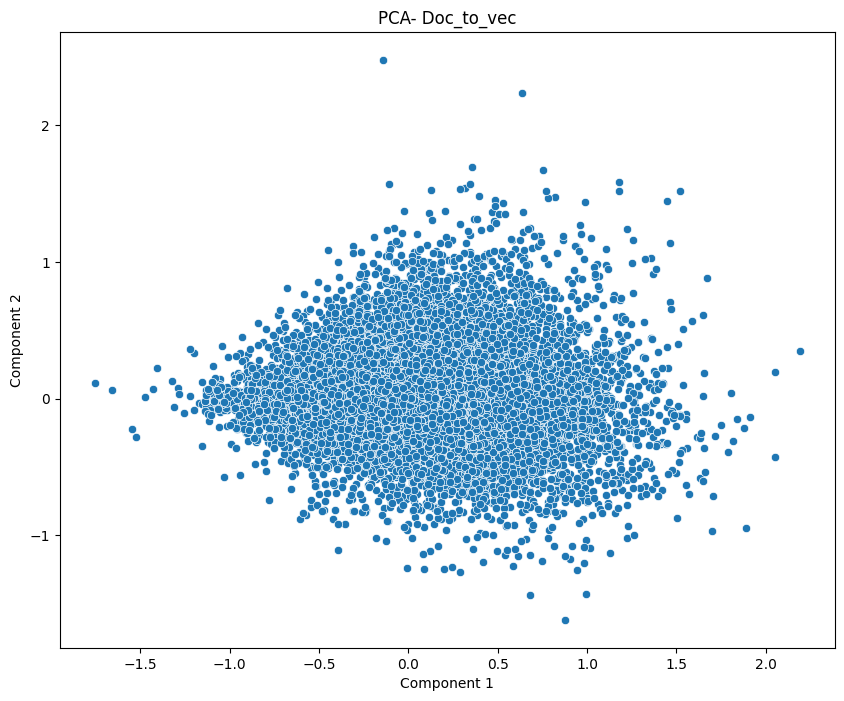

In [37]:
# crea PCA dos componentes
doc_vect_2d = PCA(n_components=2).fit_transform(doc_vectors)
doc_vect_2d = pd.DataFrame(doc_vect_2d, columns=['PCA_1', 'PCA_2'])
df_final = pd.concat([df, doc_vect_2d], axis=1)

# Plotting PCA Components
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'PCA_1', y='PCA_2', data = df_final)

# Title and labels
plt.title('PCA- Doc_to_vec')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Show plot
plt.show()

In [38]:
doc_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.130028,-0.301074,-0.043919,0.231528,0.153537,-0.398309,0.247218,0.279629,0.041590,-0.511688,...,-0.283395,-0.059600,-0.141016,-0.089664,-0.108954,0.212667,-0.382777,0.309297,0.207687,0.020869
1,0.247709,-0.288315,0.129988,0.134914,0.395066,-0.259244,0.169741,-0.028860,0.310237,-0.380578,...,-0.174634,-0.266014,-0.337551,-0.077453,0.173885,0.348592,-0.375891,0.130111,0.319233,0.090313
2,0.553479,-0.140771,0.195071,0.265244,-0.216975,-0.389804,0.221313,0.230469,0.541940,-0.130281,...,-0.011516,-0.468856,-0.043250,-0.094065,-0.216657,0.038289,-0.244448,0.247747,0.798530,0.334572
3,-0.085778,0.011107,-0.136855,0.076507,0.204229,-0.269971,0.054187,0.189631,-0.073243,-0.274360,...,0.160604,0.133152,-0.144551,0.213521,0.020989,0.010253,-0.011368,-0.067837,-0.036973,0.039836
4,-0.229538,-0.173484,0.037686,0.333020,-0.063741,-0.354264,-0.047942,0.058788,-0.237734,-0.185190,...,0.049898,0.095673,-0.103596,0.136276,-0.012984,-0.008384,-0.283389,-0.086106,-0.051318,-0.013917


In [39]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.3 MB/s eta 0:00:00


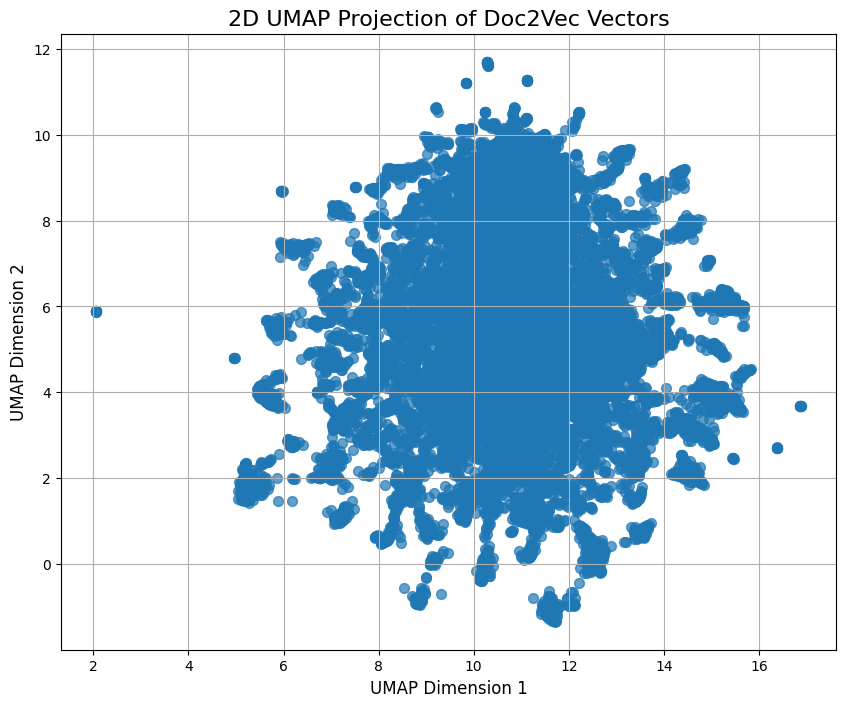

In [40]:
import umap
import matplotlib.pyplot as plt
import numpy as np

# Example: Assume 'vectors' is your Doc2Vec vector array (shape: [n_docs, vector_size])
# Step 1: Reduce dimensions with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
reduced_vectors = umap_model.fit_transform(doc_vectors)

# Step 2: Plot the reduced vectors in 2D
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], s=50, alpha=0.7)

plt.title('2D UMAP Projection of Doc2Vec Vectors', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.grid(True)
plt.show()


In [41]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis across all dimensions
skewness = skew(doc_vectors, axis=0).mean()
kurt = kurtosis(doc_vectors, axis=0).mean()

print(f"Average Skewness: {skewness}")
print(f"Average Kurtosis: {kurt}")

if abs(skewness) < 0.5 and abs(kurt - 3) < 0.5:
    print("Data is likely close to normal.")
else:
    print("Data deviates from normal.")


Average Skewness: -0.13167184591293335
Average Kurtosis: 3.395941972732544
Data is likely close to normal.


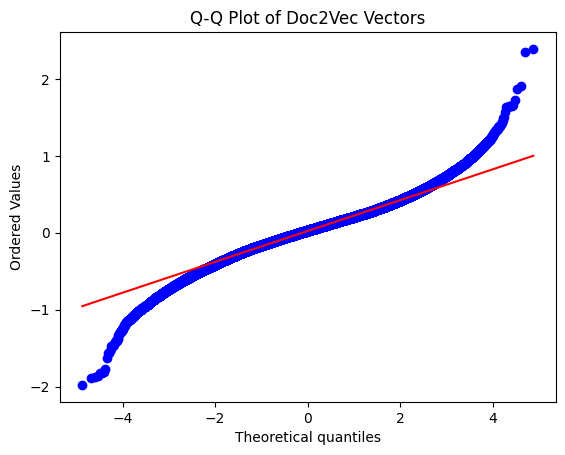

In [42]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

doc_array = doc_vectors.to_numpy()
# Flatten all elements into a 1D array
flattened_data = doc_array.flatten()

# Generate a Q-Q plot
stats.probplot(flattened_data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Doc2Vec Vectors")
plt.show()


# **Observaciones dominantes**

In [43]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Compute the average vector (centroid of all vectors)
# Convert 'doc2vec' column to a list of arrays with consistent shapes
doc2vec_list = [np.array(x) for x in df['doc2vec'].to_list()]
# Stack the list of arrays into a 2D NumPy array
doc2vec_array = np.vstack(doc2vec_list)

avg_vector = np.mean(doc2vec_array, axis=0)

# Calculate cosine similarity of each abstract to the average vector
similarities = cosine_similarity(doc2vec_array, avg_vector.reshape(1, -1))

# Get the index of the most dominant abstract (highest similarity)
dominant_index = np.argmax(similarities)

print(f"The most dominant abstract index: {dominant_index}")

# Get the indices of the 500 most dominant abstracts (highest similarities)
dominant_indices = np.argpartition(similarities[:, 0], -1000)[-1000:] #Get indices of 10 largest values

print(f"The 500 most dominant abstract indices: {dominant_indices}")

The most dominant abstract index: 13330
The 500 most dominant abstract indices: [ 3697 22377  5004 22667  6115 24247 16377   619 13394 11761  6101  8037
  6147 21253  3682 14481 14470 11693  7462 17753 17804 22407 17702 19965
  2145 20254 11675  5399   154   155 17811 20264 13426 17832 11659 11658
   436 17842 11652  9006  3327 24223 17621   419 21139 22864  1789 11638
 13444 23612 20244 16353 23615 16448 16343  8009 13452 11620 13322  8938
  9035 21248 13321  9058  3090 11587  3340   168  9060 11553 16449  2165
 17583 19910 16288  5379 21962  8478  9104  1191 11500  1702  8105 20687
 20686 16224 21246 17539  5366  3387  3393  4023 22084 18053  1551 16200
 13308 17477   473  1880  5333 19859  4047  5459  2218 22381 11451 18068
 20641 18069 13585 22481 13615 18072 23824 21241 14441 17457 11367 22482
  5996  6340  5314   398  8470  7661 18079  2039  5991 17456 14764  1811
 11958 22103 22378 20008 12020  2253 16112 11276 14906 14908  3424 18090
  1974  7989 14919 23206 12859  4671 13227 1

In [44]:
dominant_df = df.iloc[dominant_indices]

# Display the new DataFrame
dominant_df.head(10)

,Id Fiscalizacion,Numero Programa,Periodo Programa,Tipo Fiscalizacion,Nombre Fiscalizacion,Materia Fiscalizacion,Objetivo Fiscalizacion,ID Entidad,Dependencia,Entidad,...,Año informe publicado,Link informe publicado,ID Observacion,Titulo Observacion,Complejidad Observacion,Accion derivada,Accion correctiva,tokenized_text,obs_len,doc2vec
3697,72309,22027,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE TALCAHUANO,ACTIVIDADES PREVIAS,La auditoría tendrá por objeto verificar el cu...,189,MUNICIPALIDAD DE TALCAHUANO,MUNICIPALIDAD DE TALCAHUANO,...,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,283182.0,Pasivos no registrados.,COMPLEJA,Sin datos,"Esa repartición edilicia deberá, en lo sucesiv...","[pasivos, no, registrados]",3,"[-0.07844518, -0.07777203, -0.08843338, 0.1573..."
22377,89151,5085,2023,AUDITORIA,AUDITORIA MUNICIPALIDAD DE COQUIMBO UCE IV,AUDITORÍA DE CUMPLIMIENTO: PROGRAMA NACIONAL L...,La fiscalización tendrá por objeto efectuar un...,29,MUNICIPALIDAD DE COQUIMBO,MUNICIPALIDAD DE COQUIMBO,...,2023.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,408214.0,Sobre ítems conciliatorios de antigua data.,COMPLEJA,Sin datos,Esta entidad deberá dar cumplimiento a lo disp...,"[sobre, ítems, conciliatorios, de, antigua, data]",6,"[-0.10416087, -0.13871473, -0.101404764, 0.127..."
5004,73087,22027,2020,AUDITORIA,AUDITORIA CORPORACION MUNICIPAL DE VALPARAISO,AUDITORÍA Y EXAMEN DE CUENTAS A LOS GASTOS PAG...,La auditoría tendrá por objeto verificar el cu...,956,MUNICIPALIDAD DE VALPARAISO,CORPORACION MUNICIPAL DE VALPARAISO,...,2020.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,271635.0,6 Gastos improcedentes realizados por los lice...,ALTAMENTE COMPLEJA,Procedimiento disciplinario CGR,NaN,"[gastos, improcedentes, realizados, por, los, ...",13,"[-0.11428604, -0.070913844, -0.11478802, 0.111..."
22667,89256,37075,2023,AUDITORIA,AUDITORIA MUNICIPALIDAD DE SAN IGNACIO UCE XVI,AUDITORÍA SIMPLIFICADA CON LA FINALIDAD DE VER...,Se efectuará una fiscalización con la finalida...,183,MUNICIPALIDAD DE SAN IGNACIO,MUNICIPALIDAD DE SAN IGNACIO,...,2023.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,397243.0,Sobre aprobación del concejo municipal.,COMPLEJA,Sin datos,NaN,"[sobre, aprobación, del, concejo, municipal]",5,"[-0.088067785, -0.19658685, -0.19568613, 0.109..."
6115,75569,18028,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE EL MONTE,EFECTUAR UNA FISCALIZACIÓN Y EXAMEN DE CUENTAS...,Efectuar una fiscalización y examen de cuentas...,287,MUNICIPALIDAD DE EL MONTE,MUNICIPALIDAD DE EL MONTE,...,2021.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,301068.0,Error de imputación contable.,COMPLEJA,Sin datos,NaN,"[error, de, imputación, contable]",4,"[-0.13020316, -0.09659219, -0.1581379, 0.10047..."
24247,91171,5116,2023,AUDITORIA,AUDITORIA MUNICIPALIDAD DE PUTAENDO UCE V,AUDITORÍA A LAS TECNOLOGÍAS DE LA INFORMACIÓN ...,Auditoría a las Tecnologías de la Información ...,65,MUNICIPALIDAD DE PUTAENDO,MUNICIPALIDAD DE PUTAENDO,...,2023.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,414331.0,12.\tEquipos Informáticos administrados por la...,ALTAMENTE COMPLEJA,Procedimiento disciplinario por el servicio,regularizar el uso de los softwares no licenci...,"[equipos, informáticos, administrados, por, la...",6,"[-0.08220867, -0.07261943, -0.14133887, 0.0972..."
16377,84228,5065,2022,AUDITORIA,AUDITORIA DEPARTAMENTO DE EDUCACION DE EL TABO...,AUDITORÍA Y EXAMEN DE CUENTAS A LAS ADQUISICIO...,Auditoría y examen de cuentas a las adquisicio...,389,MUNICIPALIDAD DE EL TABO,DEPARTAMENTO DE EDUCACION DE EL TABO,...,2022.0,http://www.contraloria.cl/SicaProd/SICAv3-BIFA...,374443.0,22.\tAdquisición de equipos computacionales.,ALTAMENTE COMPLEJA,Remitir antecedentes para conocimiento del Min...,NaN,"[adquisición, de, equipos, computacionales]",4,"[-0.046946593, -0.1303534, -0.07158236, 0.0950..."
619,71818,22027,2020,AUDITORIA,AUDITORIA MUNICIPALIDAD DE ÑUÑOA,PROGRAMA ESTADO DE LA GESTIÓN MUNICIPAL EN AÑO...,La auditoría tendrá por objeto veri

In [45]:
dominant_df.shape

(1000, 26)

In [46]:
# Bag of Words model
bow_vectorizer_2 = CountVectorizer(
    analyzer='word',
    max_df=0.95, #Esto significa que cualquier palabra que aparezca en el 95% o más de los documentos será ignorada.
    min_df=2, #Esto significa que se ignorarán las palabras que aparezcan en menos de 2 documentos.
    #stop_words='english',  #
    token_pattern=r'\b(?!falta|ausencia|respecto|cuentas|sobre)[a-zA-ZáéíóúÁÉÍÓÚñÑ]{5,}\b' # Devuelve una coincidencia para cualquier carácter alfabéticamente entre A y Z, minúscula o mayúscula (desde 4 letras)
)

# CountVectorizer se aplica a DataFrame
bow_matrix_dominant = bow_vectorizer_2.fit_transform(dominant_df['Titulo Observacion'])

# Convierta la matriz BoW en un DataFrame para una fácil visualización
bow_df_dominant = pd.DataFrame(bow_matrix_dominant.toarray(), columns=bow_vectorizer_2.get_feature_names_out())

# BoW DataFrame
bow_df_dominant.head()

,aclaradas,acreditada,acreditado,acreditados,acreedores,actos,adjudicación,administrados,administrativa,administrativos,...,trimestrales,usuarios,utilización,validaciones,validación,voluntarios,vulnerabilidades,áridos,ítems,órdenes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


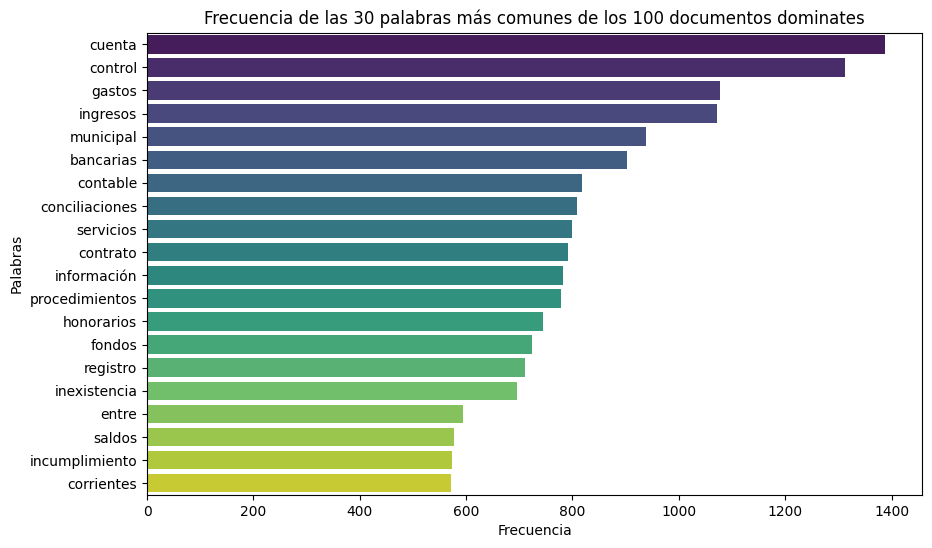

In [47]:
#Visualizar las 30 palabras mas frecuentes
word_freq_2 = bow_df_dominant.sum(axis=0).sort_values(ascending=False)

# Selecciona las 30 palabras más frecuentes
top_30_words = word_freq.head(30)

# Visualiza las 30 palabras más frecuentes en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_words.values, y=top_20_words.index, palette='viridis')
plt.title("Frecuencia de las 30 palabras más comunes de los 100 documentos dominates")
plt.xlabel("Frecuencia")
plt.ylabel("Palabras")
plt.show()

In [48]:
tfidf_vectorizer_2 = TfidfVectorizer(
    analyzer='word',
    max_df=0.95,
    min_df=2,
    #stop_words= 'english',
    token_pattern=r'\b(?!falta|ausencia|respecto|cuentas|sobre)[a-zA-ZáéíóúÁÉÍÓÚñÑ]{5,}\b'
)

# Apply the TfidfVectorizer to the 'text' column in the DataFrame
tfidf_matrix_2 = tfidf_vectorizer_2.fit_transform(dominant_df['Titulo Observacion'])

# Convert the TF-IDF matrix to a DataFrame for easy visualization
tfidf_df_2 = pd.DataFrame(tfidf_matrix_2.toarray(), columns=tfidf_vectorizer_2.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
tfidf_df_2.head()

,aclaradas,acreditada,acreditado,acreditados,acreedores,actos,adjudicación,administrados,administrativa,administrativos,...,trimestrales,usuarios,utilización,validaciones,validación,voluntarios,vulnerabilidades,áridos,ítems,órdenes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634121,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


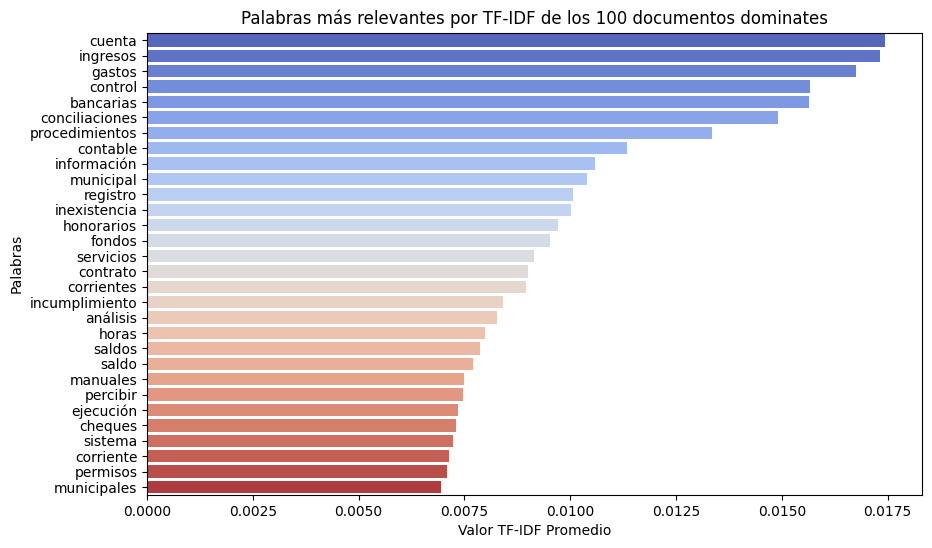

In [49]:
#Visualizando las 30 palabras mas relevantes segun TF-IDF
tfidf_mean_2 = tfidf_df_2.mean(axis=0).sort_values(ascending=False)

# Selecciona las 30 palabras con los valores TF-IDF más altos
top_30_tfidf = tfidf_mean.head(30)

# Visualiza las 30 palabras más relevantes en un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_30_tfidf.values, y=top_30_tfidf.index, palette='coolwarm')
plt.title("Palabras más relevantes por TF-IDF de los 100 documentos dominates")
plt.xlabel("Valor TF-IDF Promedio")
plt.ylabel("Palabras")
plt.show()

# **LDA on dominant documents**

Number of Topics: 2, Perplexity: 348.149, Coherence Score: 0.569
Number of Topics: 3, Perplexity: 392.326, Coherence Score: 0.513
Number of Topics: 4, Perplexity: 408.886, Coherence Score: 0.510
Number of Topics: 5, Perplexity: 448.359, Coherence Score: 0.503
Number of Topics: 6, Perplexity: 472.666, Coherence Score: 0.530
Number of Topics: 7, Perplexity: 480.278, Coherence Score: 0.508
Number of Topics: 8, Perplexity: 486.244, Coherence Score: 0.524
Number of Topics: 9, Perplexity: 524.956, Coherence Score: 0.505


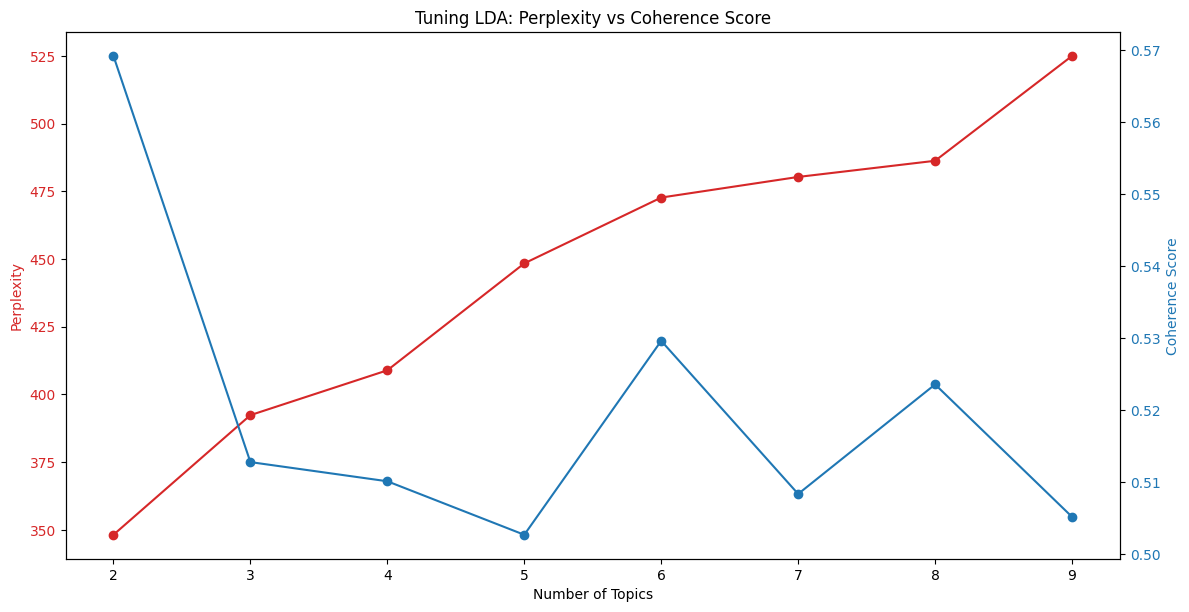

Topic 1:
terreno cheques validación validaciones partidas caducados conciliadas corrientes deuda análisis flotante acreditados facturas desembolsos extemporáneo
Topic 2:
manuales procedimientos funciones contable inexistencia imputación segregación concentración error horas procedimiento permisos multas establecidas exigencias


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
import gensim
import gensim.corpora as corpora

# Example DataFrame
# df = pd.DataFrame({
#     'Document': ["text of document 1", "text of document 2", "text of document 3", ...]
# })
dominant_df['tokenized_text_1'] = dominant_df['tokenized_text'].apply(lambda x: ' '.join(x))
# Step 1: Convert documents into a document-term matrix using CountVectorizer
count_vectorizer = TfidfVectorizer(
    analyzer='word',
    max_df=0.95,
    min_df=2,
    #stop_words= 'english',
    token_pattern=r'\b(?!falta|ausencia|respecto|cuentas|sobre)[a-zA-ZáéíóúÁÉÍÓÚñÑ]{5,}\b'
    )
count_data = count_vectorizer.fit_transform(dominant_df['tokenized_text_1'])

# Step 2: Tune the number of topics using Perplexity and Coherence Score
num_topics_range = range(2, 10)  # Range of topics to try
perplexity_scores = []
coherence_scores = []

# Prepare the data for gensim coherence calculation
texts = [doc.split() for doc in dominant_df['tokenized_text_1']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

for num_topics in num_topics_range:
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(count_data)

    # Calculate Perplexity
    perplexity = lda_model.perplexity(count_data)
    perplexity_scores.append(perplexity)

    # Calculate Coherence Score using gensim
    lda_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, iterations=200, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

    print(f"Number of Topics: {num_topics}, Perplexity: {perplexity:.3f}, Coherence Score: {coherence_score:.3f}")

# Step 3: Plot the results to visualize optimal number of topics
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Perplexity', color=color)
ax1.plot(num_topics_range, perplexity_scores, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Coherence Score', color=color)  # we already handled the x-label with ax1
ax2.plot(num_topics_range, coherence_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Tuning LDA: Perplexity vs Coherence Score')
plt.show()

# Step 4: Choose the optimal number of topics (based on Perplexity and Coherence)
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]

# Final LDA Model with the chosen number of topics
lda_final = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42)
lda_final.fit(count_data)

# Display top words for each topic
n_top_words = 15
feature_names = count_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_final.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))